# Regressão Linear

Na regressão linear, procuramos prever o valor de uma variável contínua com base em uma única variável ou em um conjunto de variáveis.<p>

O exemplo que abordaremos abaixo procura prever o tempo de vida com base no peso, altura, atividade física, IMC, sexo e se a pessoa tem histórico de tabagismo.<p>

Com a regressão linear, assumimos que a variável de saída (tempo de vida neste exemplo) está linearmente relacionada aos recursos que temos (veremos modelos não lineares no próximo módulo).<p>

Este exemplo usa um conjunto de dados sintético.

## Dados

In [1]:
# https://gitlab.com/michaelallen1966/1804_python_healthcare_wordpress/tree/master/jupyter_notebooks
import pandas as pd

filename = 'https://gitlab.com/michaelallen1966/1804_python_healthcare_wordpress/raw/master/jupyter_notebooks/life_expectancy.csv'
df = pd.read_csv(filename)
df.head()

,weight,smoker,physical_activity_scale,BMI,height,male,life_expectancy
0,51,1,6,22,152,1,57
1,83,1,5,34,156,1,36
2,78,1,10,18,208,0,78
3,106,1,3,28,194,0,49
4,92,1,7,23,200,0,67


In [17]:
df

,weight,smoker,physical_activity_scale,BMI,height,male,life_expectancy
0,51,1,6,22,152,1,57
1,83,1,5,34,156,1,36
2,78,1,10,18,208,0,78
3,106,1,3,28,194,0,49
4,92,1,7,23,200,0,67
5,83,0,8,24,185,1,68
6,71,1,4,32,148,1,38
7,88,0,2,24,191,1,63
8,93,0,1,31,173,1,48
9,63,0,6,26,155,1,65


In [18]:
#Fumantes
df['smoker'].value_counts()

0    694
1    306
Name: smoker, dtype: int64

## Análise de dados Exploratória

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


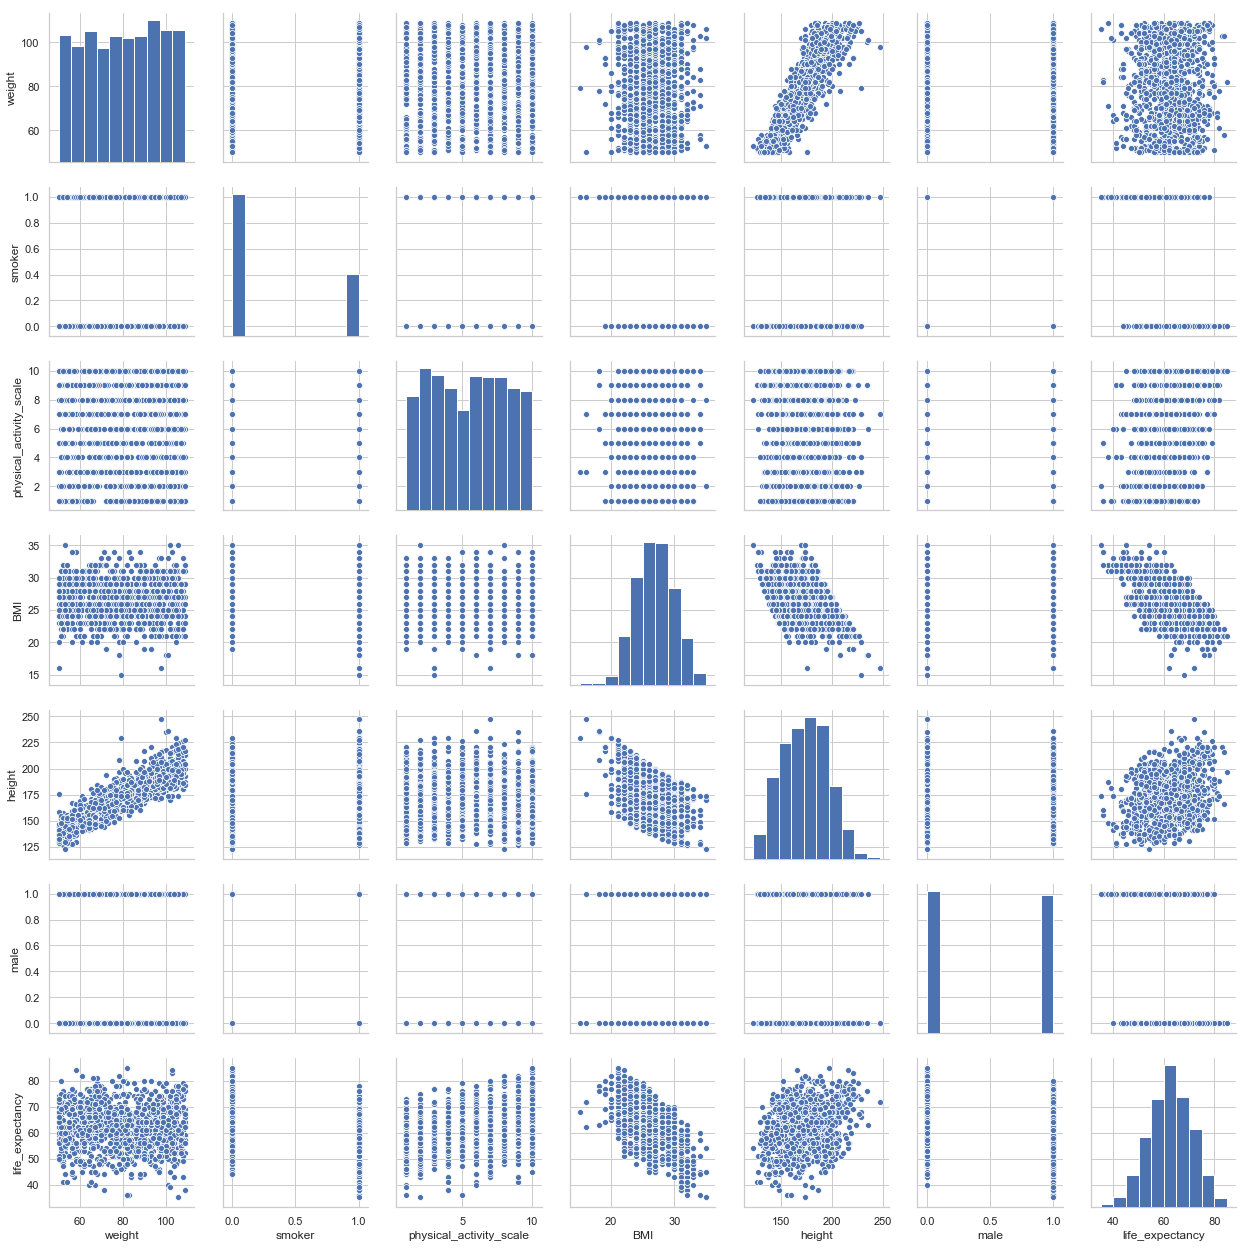

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(style = 'whitegrid', context = 'notebook')
sns.pairplot(df, size = 2.5)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x226e4895048>,
 'caps': [<matplotlib.lines.Line2D at 0x226e35bca90>,
 'boxes': [<matplotlib.lines.Line2D at 0x226e4895908>],
 'medians': [<matplotlib.lines.Line2D at 0x226e35bcfd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x226e35bc240>],
 'means': []}

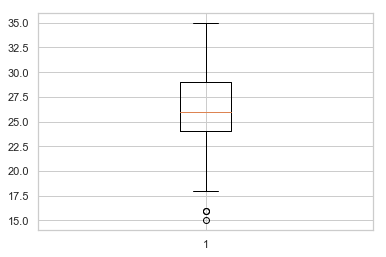

In [25]:
plt.boxplot(df["BMI"])

{'whiskers': [<matplotlib.lines.Line2D at 0x226e32672e8>,
 'caps': [<matplotlib.lines.Line2D at 0x226e32679e8>,
 'boxes': [<matplotlib.lines.Line2D at 0x226e3285ef0>],
 'medians': [<matplotlib.lines.Line2D at 0x226e3267b70>],
 'fliers': [<matplotlib.lines.Line2D at 0x226e32704a8>],
 'means': []}

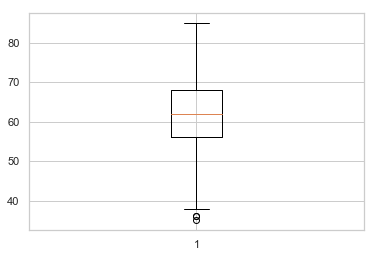

In [22]:
plt.boxplot(df["life_expectancy"])
#plt.boxplot(column='weight', by='life_expectancy')

{'whiskers': [<matplotlib.lines.Line2D at 0x226e57fb7f0>,
 'caps': [<matplotlib.lines.Line2D at 0x226e57fbef0>,
 'boxes': [<matplotlib.lines.Line2D at 0x226e57fb438>],
 'medians': [<matplotlib.lines.Line2D at 0x226e570a630>],
 'fliers': [<matplotlib.lines.Line2D at 0x226e570a9b0>],
 'means': []}

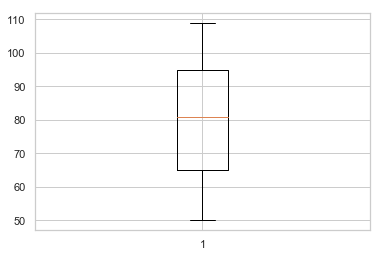

In [23]:
plt.boxplot(df["weight"])
#plt.boxplot(column='weight', by='life_expectancy')

Podemos mostrar a matriz de correlação com np.corrcoef (np.cov mostraria a matriz de covariância não padronizada; uma matriz de correlação tem os mesmos valores que uma matriz de covariância em dados padronizados). Observe que precisamos transpor nossos dados para que cada recurso esteja em uma linha e não em uma coluna.

Ao construir um modelo de regressão linear, estamos mais interessados nas características que têm a correlação mais forte com o nosso resultado. Se houver alto grau de covariância entre os recursos, poderemos considerar a utilização de uma análise de componentes para reduzir o conjunto de dados.

Correlation matrix:

[[ 1.    -0.012 -0.03  -0.011  0.879 -0.004 -0.009]
 [-0.012  1.     0.034 -0.027  0.006  0.018 -0.518]
 [-0.03   0.034  1.    -0.028 -0.009 -0.007  0.366]
 [-0.011 -0.027 -0.028  1.    -0.477 -0.019 -0.619]
 [ 0.879  0.006 -0.009 -0.477  1.     0.006  0.278]
 [-0.004  0.018 -0.007 -0.019  0.006  1.    -0.299]
 [-0.009 -0.518  0.366 -0.619  0.278 -0.299  1.   ]]



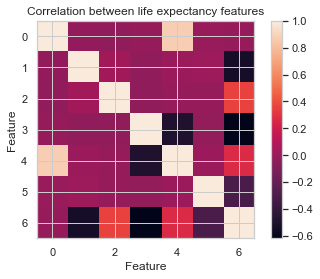

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

np.set_printoptions(precision=3)
corr_mat = np.corrcoef(df.values.T)
print ('Correlation matrix:\n')
print (corr_mat)
print ()

# Plot correlation matrix
plt.imshow(corr_mat, interpolation='nearest')
plt.colorbar()
plt.xlabel('Feature')
plt.ylabel('Feature')
plt.title('Correlation between life expectancy features')
plt.show()

## Ajustando um modelo de regressão linear usando um único recurso

Para ilustrar a regressão linear, começaremos com um único recurso. Nós vamos escolher o IMC (MBI).

In [5]:
X = df['BMI'].values.reshape(-1, 1) 
X = X.astype('float')
y = df['life_expectancy'].values.reshape(-1, 1)
y = y.astype('float')

# Standardise X and y
# Though this may often not be necessary it may help when features are on
# very different scales. We won't use the standardised data here,
# but here is how it would be done
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_std = sc_X.fit_transform(X)
Y_std = sc_y.fit_transform(X)

# Create linear regression model
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X, y)

# Print model coefficients
print ('Slope =', slr.coef_[0])
print ('Intercept =', slr.intercept_)


Slope = [-1.739]
Intercept = [107.874]


## Previsão de valores

Podemos simplesmente usar o método de previsão do modelo de regressão linear para prever valores para qualquer dado X. (Usamos 'flatten' abaixo para mudar de um array de coluna para um array de linha).

In [6]:
y_pred = slr.predict(X)

print ('Actual = ', y[0:5].flatten())
print ('Predicted = ', y_pred[0:5].flatten())


Actual =  [57. 36. 78. 49. 67.]
Predicted =  [69.616 48.748 76.572 59.182 67.877]


## Obtendo métricas de observado versus previsto

O módulo de métricas do sklearn contém um método simples de reportar métricas, dados os valores observados e previstos.

In [7]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))
print('R-square:',metrics.r2_score(y, y_pred))

Mean Absolute Error: 5.539437852902253
Mean Squared Error: 45.96542302416134
Root Mean Squared Error: 6.77978045545439
R-square: 0.38264888475219305


## Plotando valores observados e linha ajustada

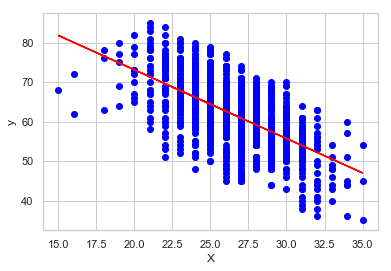

In [8]:
plt.scatter (X, y, c = 'blue')
plt.plot (X, slr.predict(X), color = 'red')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

## Plotando valores observados vs. previstos

Plotando observado vs. previsto pode dar um bom senso da precisão do modelo, e também é adequado quando há vários recursos do X.

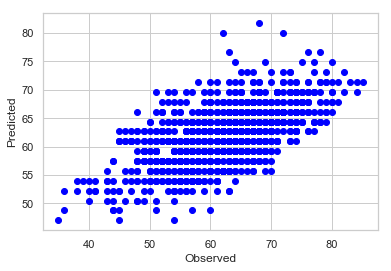

In [9]:
plt.scatter (y, slr.predict(X), c = 'blue')
plt.xlabel('Observed')
plt.ylabel('Predicted')
plt.show()

## Colocar um modelo em vários recursos do X

O método descrito acima funciona com qualquer número de recursos do X. Geralmente, podemos escolher esses recursos com a correlação mais alta com o valor do resultado, mas aqui usaremos todos eles.

In [10]:
X = df.values[:, :-1]
y = df.values[:, -1]

In [11]:
# Create linear regression model
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X, y)

# Print model coefficients
print ('Slope =', slr.coef_)
print ('Intercept =', slr.intercept_)

Slope = [  0.145 -10.12    1.104  -2.225  -0.135  -5.148]
Intercept = 132.19101015926194


Mostrar métricas (observe a melhoria)

In [12]:
y_pred = slr.predict(X)
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))
print('R-square:',metrics.r2_score(y, y_pred))


Mean Absolute Error: 2.4055613150977195
Mean Squared Error: 7.964564246225555
Root Mean Squared Error: 2.8221559571054105
R-square: 0.8930297537502133


Gráfico observado vs. previsto:

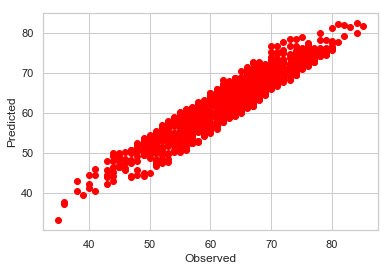

In [14]:
plt.scatter (y, slr.predict(X), c = 'red')
plt.xlabel('Observed')
plt.ylabel('Predicted')
plt.show()

## Resíduos de plotagem

Resíduos são simplesmente a diferença entre um valor observado e seu valor previsto. Podemos definir a relação entre os valores observados e os resíduos. Idealmente, gostamos de ver que não existe uma relação clara entre o valor previsto e o residual - os resíduos devem ser distribuídos aleatoriamente. A plotagem residual também pode ser usada para verificar se há algum valor discrepante que possa estar afetando nosso modelo (nesse caso, podemos considerar melhor remover os valores discrepantes e reconectá-los).

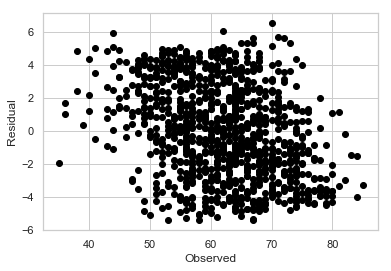

In [16]:
residuals = slr.predict(X) - y # predicted - observed
plt.scatter (y, residuals, c = 'black')
plt.xlabel('Observed')
plt.ylabel('Residual')
plt.show()